In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设你的数据集路径是 'your_dataset.csv'
# 加载数据集
ds = pd.read_csv('3_clean.csv')
data = ds
# 预览数据
print(data.head())

# 获取描述性统计信息
print(data.describe())

      timestamp_call_key  retailer_code       serial  reason  \
0  240315173250 DAL1OA3M              0  10010009499       0   
1  240315124742 DAL15XHK              1  10006021998       1   
2  240317114237 DAL3BLK6              2  10016007830       2   
3  240314120849 PHX6PL4U              1  10008003199       1   
4  240314145902 DAL68RYS              3  10013002037       1   

                    mos  resolved  no_of_accounts_with_syf_13_march  \
0              IA PP TR         0                               1.0   
1        IA BA TS nl TR         1                               2.0   
2  IA AA BA MR nl PT TR         0                              12.0   
3                 IA BA         0                               2.0   
4     IA BA TS nl mm TR         1                               6.0   

   account_balance_13_march  delinquency_history_13_march  \
0                       NaN                             0   
1                    143.28                             0   
2    

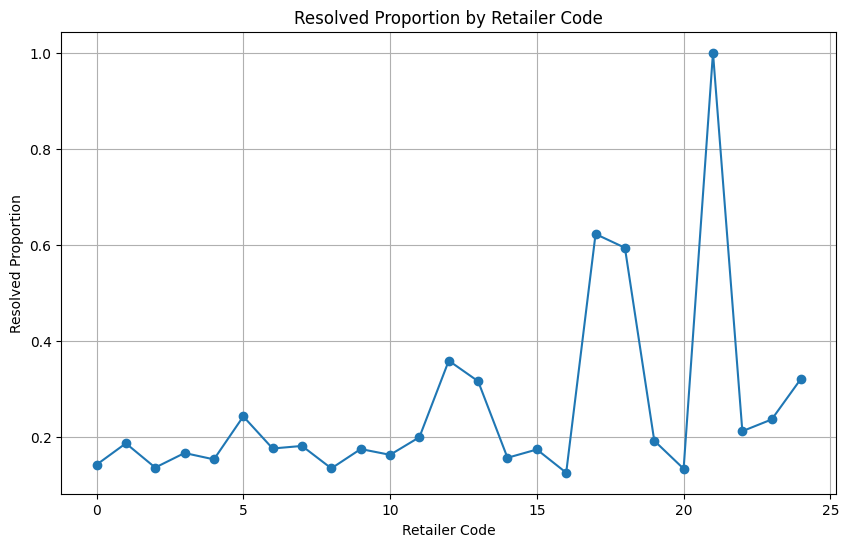

In [28]:
n = data['retailer_code'].max()  # 假设 retailer_code 的最大值代表 n

# 初始化存储比例的字典
resolved_proportions = []

# 遍历每个 retailer_code 并计算比例
for code in range(n + 1):
    filtered_data = data[data['retailer_code'] == code]
    if not filtered_data.empty:
        resolution_counts = filtered_data['resolved'].value_counts(
            normalize=True)
        # 假设解决状态为 1 表示未解决，0 表示已解决
        resolved_proportion = resolution_counts.get(1, 1)  # 获取已解决的比例，默认为0
        resolved_proportions.append(resolved_proportion)
    else:
        resolved_proportions.append(0)  # 如果没有数据则比例为0

# 绘制比例变化曲线
plt.figure(figsize=(10, 6))
plt.plot(range(n + 1), resolved_proportions, marker='o', linestyle='-')
plt.title('Resolved Proportion by Retailer Code')
plt.xlabel('Retailer Code')
plt.ylabel('Resolved Proportion')
plt.grid(True)
plt.show()

In [32]:
filtered_data = data[data['retailer_code'] == 17]

# 计算解决和未解决的数量
resolution_counts = filtered_data['resolved'].value_counts()

# 计算比例
resolution_proportions = resolution_counts / resolution_counts.sum()

# 输出结果
print("Resolution proportions for retailer_code 4:")
print(resolution_proportions)

retailer_code_count = data['retailer_code'].value_counts().get(17, 0)

print(f"Number of rows: {retailer_code_count}")

Resolution proportions for retailer_code 4:
resolved
0    0.787879
1    0.212121
Name: count, dtype: float64
Number of rows: 33


In [ ]:
filtered_data = data[data['retailer_code'] == 17]

# 获取这些行的 'mos' 值
mos_values = filtered_data['mos']